## Decision Tree

Bunch of if and else statements

![image](./decisionTree/2.jpeg)

In [69]:
import math
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

## Measurement of Impurity

* Gini
* Entropy



### **Lower impurity yields better decision boundary**


![image](./decisionTree/3.jpeg)

In [2]:
def gini(samples):
    samples_sum = sum(samples)
    score = 0
    probs = []
    for sample in samples:
        prob = sample / samples_sum
        probs.append(prob)
    for prob in probs:
        score += prob * (1 - prob)
    return score

In [10]:
def entropy(samples):
    samples_sum = sum(samples)
    score = 0
    probs = []
    for sample in samples:
        prob = sample / samples_sum
        probs.append(prob)
    for prob in probs:
        if prob>0:
            score += prob * math.log(prob)
    return -1 * score

In [11]:
sample = [100,0,0]
gini(sample), entropy(sample)

(0.0, -0.0)

In [12]:
sample = [100,100,0]
gini(sample), entropy(sample)

(0.5, 0.6931471805599453)

In [13]:
sample = [100,70,125]
gini(sample), entropy(sample)

(0.6492387245044527, 1.0718875505599827)

![image](./decisionTree/2.jpeg)

In [23]:
data = pd.read_csv('./titanic.csv')

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data = data[['Survived','Pclass','Sex']]
data.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [26]:
sex_mapping = {
    "female":0,
    "male":1
}
data.Sex = data.Sex.map(sex_mapping)
data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [30]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
# initial gini score
gini([549,342])

0.4730129578614427

![image](./decisionTree/4.jpeg)

Node A

In [35]:
# after first node

x = data[data.Pclass < 1.5]
print(x.shape)
print(x.Survived.value_counts())

(216, 3)
1    136
0     80
Name: Survived, dtype: int64


In [37]:
gini([80,136])

0.4663923182441701

In [36]:
x = data[data.Pclass > 1.5]
print(x.shape)
print(x.Survived.value_counts())

(675, 3)
0    469
1    206
Name: Survived, dtype: int64


In [38]:
gini([465,206])

0.42550545152485003

Node B

In [39]:
 x = data[data.Pclass < 2.5]
print(x.shape)
print(x.Survived.value_counts())

(400, 3)
1    223
0    177
Name: Survived, dtype: int64


In [42]:
gini([177,223])

0.4933875

In [40]:
x = data[data.Pclass > 2.5]
print(x.shape)
print(x.Survived.value_counts())

(491, 3)
0    372
1    119
Name: Survived, dtype: int64


In [41]:
gini([372,119])

0.36724586342349663

Node C

In [45]:
x = data[data.Sex > 0.5]
print(x.shape)
print(x.Survived.value_counts())

(577, 3)
0    468
1    109
Name: Survived, dtype: int64


In [46]:
gini([468,109])

0.3064437162277843

In [48]:
x = data[data.Sex < 0.5]
print(x.shape)
print(x.Survived.value_counts())

(314, 3)
1    233
0     81
Name: Survived, dtype: int64


In [49]:
gini([81,233])

0.38283500344841576

![image](./decisionTree/1.jpeg)

### score for each node is calculated by weighted average 

score for node i = summation(gini * total sample)

for node C
score = 0.383*(81+233) + 0.30*(468+109) / (314+577)


In [53]:
(0.383*(81+233) + 0.30*(468+109))/ (314+577)

0.3292502805836139

node with lowest score becomes the starting node which is node C, separation based on sex

In [54]:
data_T = data[data.Sex < 0.5]

In [59]:
x = data_T[data_T.Pclass < 1.5]
print(x.shape)
print(x.Survived.value_counts())
print(gini([3,91]))

(94, 3)
1    91
0     3
Name: Survived, dtype: int64
0.06179266636487097


In [58]:
x = data_T[data_T.Pclass > 1.5]
print(x.shape)
print(x.Survived.value_counts())
print(gini([78,142]))

(220, 3)
1    142
0     78
Name: Survived, dtype: int64
0.45768595041322313


In [65]:
x = data_T[data_T.Pclass < 2.5]
print(x.shape)
print(x.Survived.value_counts())
print(gini([9,161]))

(170, 3)
1    161
0      9
Name: Survived, dtype: int64
0.10027681660899657


In [74]:
x = data_T[data_T.Pclass > 2.5]
print(x.shape)
print(x.Survived.value_counts())
print(gini([72,72]))

(144, 3)
1    72
0    72
Name: Survived, dtype: int64
0.5


![image](./decisionTree/5.jpeg)
![image](./decisionTree/6.jpeg)

In [71]:
features = ["Sex","Pclass"]
model = DecisionTreeClassifier()
model.fit(data[features],data.Survived)

DecisionTreeClassifier()

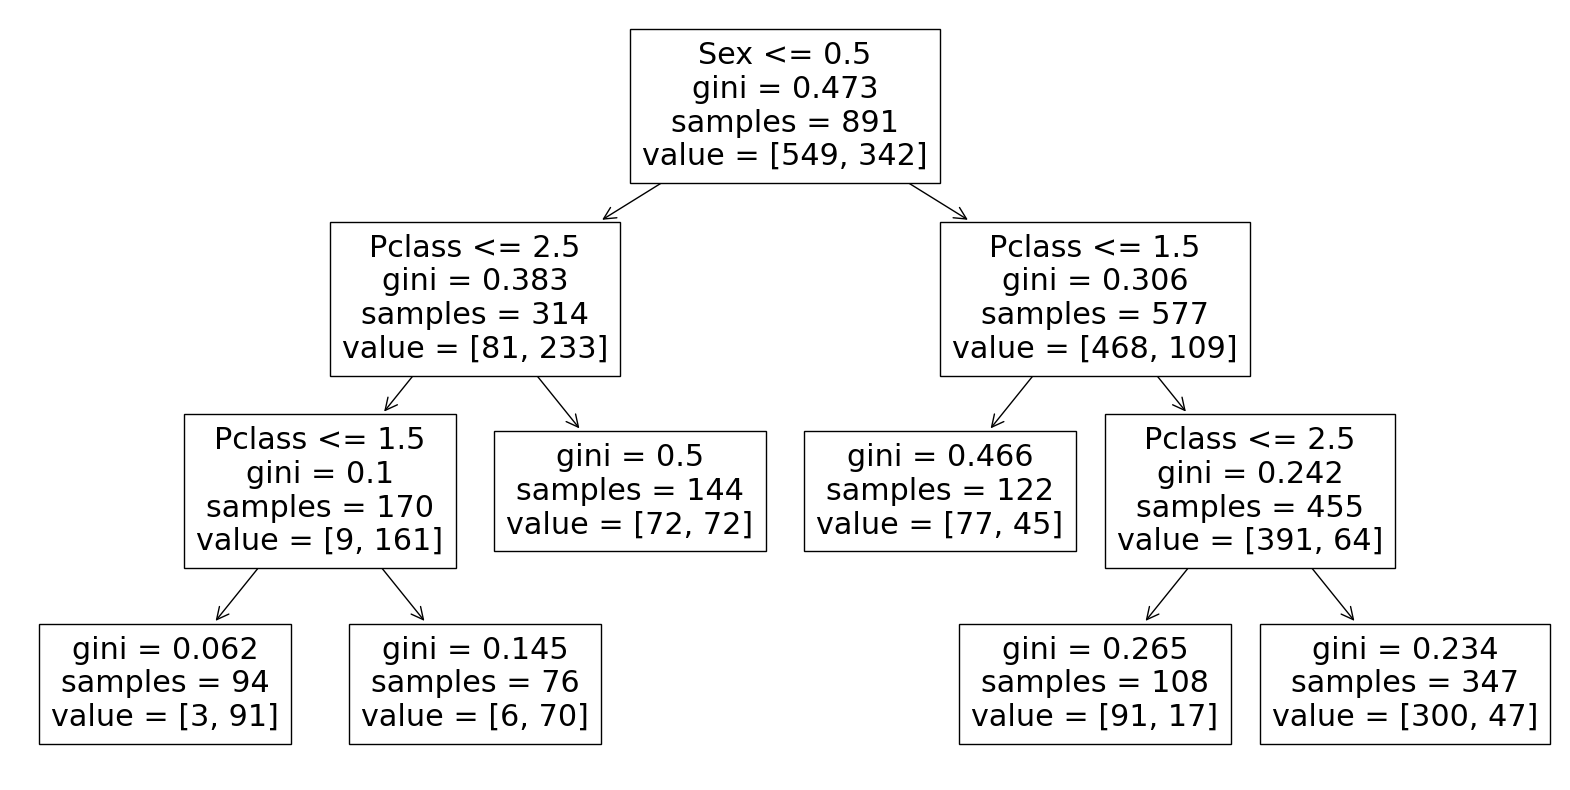

In [72]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features)
plt.show()

 #### to avoid overfitting, stop increasing the depth if gini stops decreasing by 0.1


![image](./decisionTree/7.jpeg)

Reference - 
* Prof Andrew Ng and Dr Raphael Townshend- Stanford CS229 lecture https://www.youtube.com/watch?v=wr9gUr-eWdA
* Mr. Abhishek Thakur decision tree video https://www.youtube.com/watch?v=1DMWkIJRivo&t=0s
